In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option("display.max_columns", None)

# show all rows
pd.set_option("display.max_rows", None)

# optionally expand width
pd.set_option("display.width", 1000)

#### Data consists of 21 keypoints, each with x, y and z

In [ ]:
data = pd.read_csv("Dataset/hand_landmarks_data.csv")
data.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


#### The data Contains no NULLs at all, so no imputation will be needed

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

#### X and Y are not normalized and have a larger range compared to Z

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,25675.0,2.019586e+02,9.050033e+01,-36.050926,1.241103e+02,1.996678e+02,2.664285e+02,633.556020
y1,25675.0,2.601585e+02,7.653321e+01,45.722923,2.058159e+02,2.551818e+02,3.049917e+02,781.674469
z1,25675.0,1.272461e-07,2.737932e-07,-0.000002,-5.243216e-08,1.497277e-07,2.989988e-07,0.000002
x2,25675.0,2.025174e+02,8.477093e+01,7.184681,1.305359e+02,1.999795e+02,2.611475e+02,606.232386
y2,25675.0,2.521153e+02,7.538469e+01,51.256840,1.979996e+02,2.471139e+02,2.968508e+02,751.869416
...,...,...,...,...,...,...,...,...
y20,25675.0,2.278026e+02,7.844125e+01,32.158108,1.723455e+02,2.223811e+02,2.741969e+02,760.854103
z20,25675.0,-3.220789e-02,2.087671e-02,-0.286470,-4.195717e-02,-2.850971e-02,-1.797112e-02,0.104580
x21,25675.0,2.018748e+02,9.354702e+01,-4.537216,1.263566e+02,1.974533e+02,2.673247e+02,641.788521
y21,25675.0,2.278073e+02,7.996344e+01,23.226204,1.720838e+02,2.224852e+02,2.758052e+02,760.554894


### Before proceeding, i'll add a bunch of rows with all features set to 0, to account for `no_gesture` class

In [ ]:
import pandas as pd
import numpy as np

# Generate column names
feature_cols = []
for i in range(1, 22):
    feature_cols += [f'x{i}', f'y{i}', f'z{i}']

# Create 1000x63 zero matrix
zeros = np.zeros((1000, 63))

# Create new dataframe
new_rows = pd.DataFrame(zeros, columns=feature_cols)

# Add label column
new_rows['label'] = 'no_gesture'

# Append to existing dataframe
data = pd.concat([data, new_rows], ignore_index=True)

#### checking the number of examples per class.

In [ ]:
data["label"].value_counts()

label
three2             1653
palm               1649
four               1634
ok                 1592
stop_inverted      1567
call               1506
peace_inverted     1497
stop               1482
rock               1458
three              1456
peace              1441
like               1436
two_up_inverted    1371
two_up             1343
dislike            1295
one                1263
mute               1087
no_gesture         1000
fist                945
Name: count, dtype: int64

<Axes: xlabel='label'>

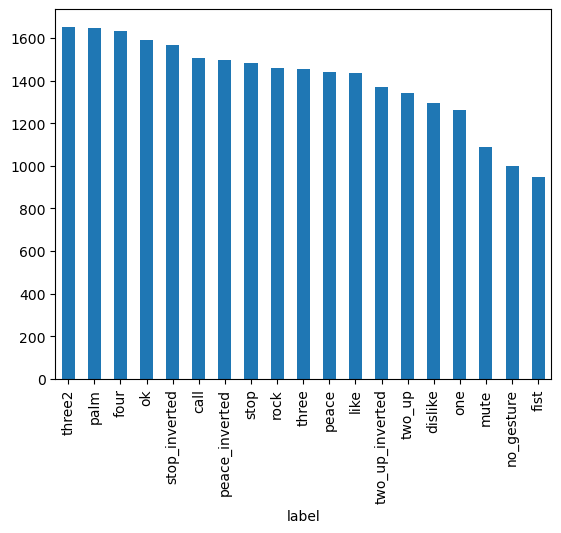

In [ ]:
data["label"].value_counts().plot(kind='bar')

the dataset is somewhat unbalanced, `fist` has 945 examples whereas `three2` has 1653
so, when splitting the data, we need to ensure that both training and testing set have equal ratios of classes examples.
this ensures a more honest evaluation of model's metrics

As advised in Hand-on Machine Learning, it's better to create a testing set before doing any sort of preprocessing.
And since the classes aren't balanced, I chose to split the data using `StartifiedShuffleSplit` rather than the ordinary `train_test_split`.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
X = data.drop(columns='label').copy()
y = data['label'].copy()

for train_idx, test_idx in splitter.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]



In [ ]:
# verifying the shapes after splitting
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(26675, 63)
(21340, 63)
(5335, 63)


label
three2             1322
palm               1319
four               1307
ok                 1274
stop_inverted      1254
call               1205
peace_inverted     1197
stop               1186
rock               1166
three              1165
peace              1153
like               1149
two_up_inverted    1097
two_up             1074
dislike            1036
one                1010
mute                870
no_gesture          800
fist                756
Name: count, dtype: int64


<Axes: xlabel='label'>

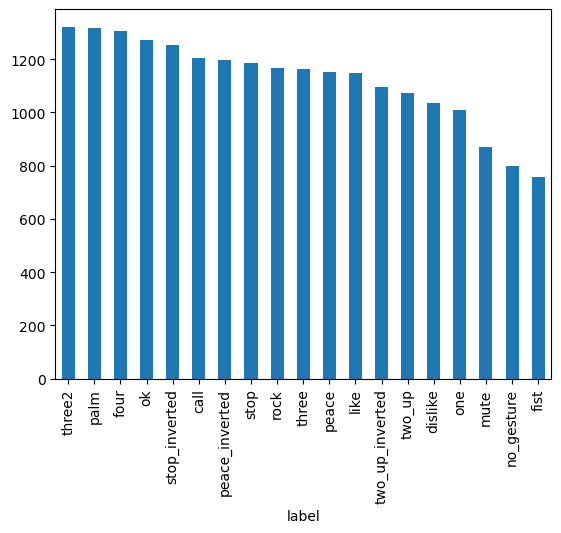

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df  = pd.concat([X_test, y_test], axis=1)

#### Ensuing that everything is okay after the splitting and merging

label
three2             1322
palm               1319
four               1307
ok                 1274
stop_inverted      1254
call               1205
peace_inverted     1197
stop               1186
rock               1166
three              1165
peace              1153
like               1149
two_up_inverted    1097
two_up             1074
dislike            1036
one                1010
mute                870
no_gesture          800
fist                756
Name: count, dtype: int64


<Axes: xlabel='label'>

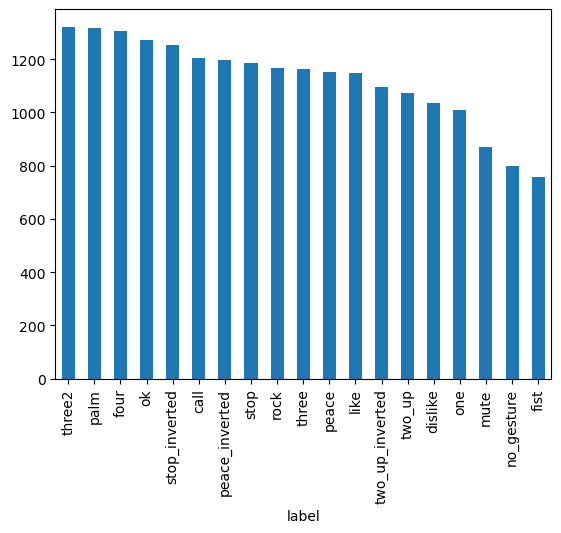

In [ ]:
print(train_df['label'].value_counts())
train_df['label'].value_counts().plot(kind='bar')

label
three2             331
palm               330
four               327
ok                 318
stop_inverted      313
call               301
peace_inverted     300
stop               296
rock               292
three              291
peace              288
like               287
two_up_inverted    274
two_up             269
dislike            259
one                253
mute               217
no_gesture         200
fist               189
Name: count, dtype: int64


<Axes: xlabel='label'>

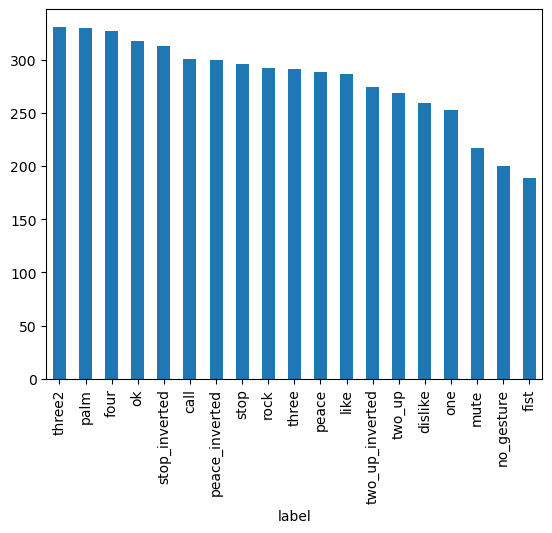

In [ ]:
print(test_df['label'].value_counts())
test_df['label'].value_counts().plot(kind='bar')

In [ ]:
train_df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
11952,291.361885,477.107860,3.227005e-07,273.351265,469.804893,-0.021741,257.849899,456.047944,-0.036077,246.435081,...,320.619621,420.607164,-0.050216,326.988373,411.664671,-0.056911,332.051514,403.524298,-0.061729,palm
13245,216.409767,230.104340,5.597291e-07,194.632988,214.868256,-0.021721,186.681152,188.989807,-0.032282,200.398178,...,238.231361,154.529755,-0.056533,230.082344,163.845276,-0.047126,226.173271,174.138290,-0.034544,peace
5577,203.223885,329.955505,-7.883936e-08,199.979530,312.652466,-0.003233,190.239338,298.260223,-0.007947,183.047310,...,172.416744,338.227478,-0.021846,177.386147,337.806305,-0.016454,182.680939,337.656006,-0.012268,like
23327,100.901905,473.833011,4.863717e-07,116.932423,460.895190,-0.023654,122.444572,439.151060,-0.029471,112.377068,...,82.452404,421.712886,-0.048491,88.997326,433.412411,-0.045543,91.119919,442.508081,-0.035305,two_up
5353,277.239693,330.853790,3.604870e-07,260.214661,322.436707,-0.015695,252.325333,303.473938,-0.022225,264.679848,...,300.095810,271.697021,-0.047862,307.344635,261.260712,-0.058197,313.429939,252.673431,-0.065017,four


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21340 entries, 11952 to 22170
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      21340 non-null  float64
 1   y1      21340 non-null  float64
 2   z1      21340 non-null  float64
 3   x2      21340 non-null  float64
 4   y2      21340 non-null  float64
 5   z2      21340 non-null  float64
 6   x3      21340 non-null  float64
 7   y3      21340 non-null  float64
 8   z3      21340 non-null  float64
 9   x4      21340 non-null  float64
 10  y4      21340 non-null  float64
 11  z4      21340 non-null  float64
 12  x5      21340 non-null  float64
 13  y5      21340 non-null  float64
 14  z5      21340 non-null  float64
 15  x6      21340 non-null  float64
 16  y6      21340 non-null  float64
 17  z6      21340 non-null  float64
 18  x7      21340 non-null  float64
 19  y7      21340 non-null  float64
 20  z7      21340 non-null  float64
 21  x8      21340 non-null  float64
 22 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5335 entries, 4622 to 23913
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5335 non-null   float64
 1   y1      5335 non-null   float64
 2   z1      5335 non-null   float64
 3   x2      5335 non-null   float64
 4   y2      5335 non-null   float64
 5   z2      5335 non-null   float64
 6   x3      5335 non-null   float64
 7   y3      5335 non-null   float64
 8   z3      5335 non-null   float64
 9   x4      5335 non-null   float64
 10  y4      5335 non-null   float64
 11  z4      5335 non-null   float64
 12  x5      5335 non-null   float64
 13  y5      5335 non-null   float64
 14  z5      5335 non-null   float64
 15  x6      5335 non-null   float64
 16  y6      5335 non-null   float64
 17  z6      5335 non-null   float64
 18  x7      5335 non-null   float64
 19  y7      5335 non-null   float64
 20  z7      5335 non-null   float64
 21  x8      5335 non-null   float64
 22  y

## Now, to visualize some samples

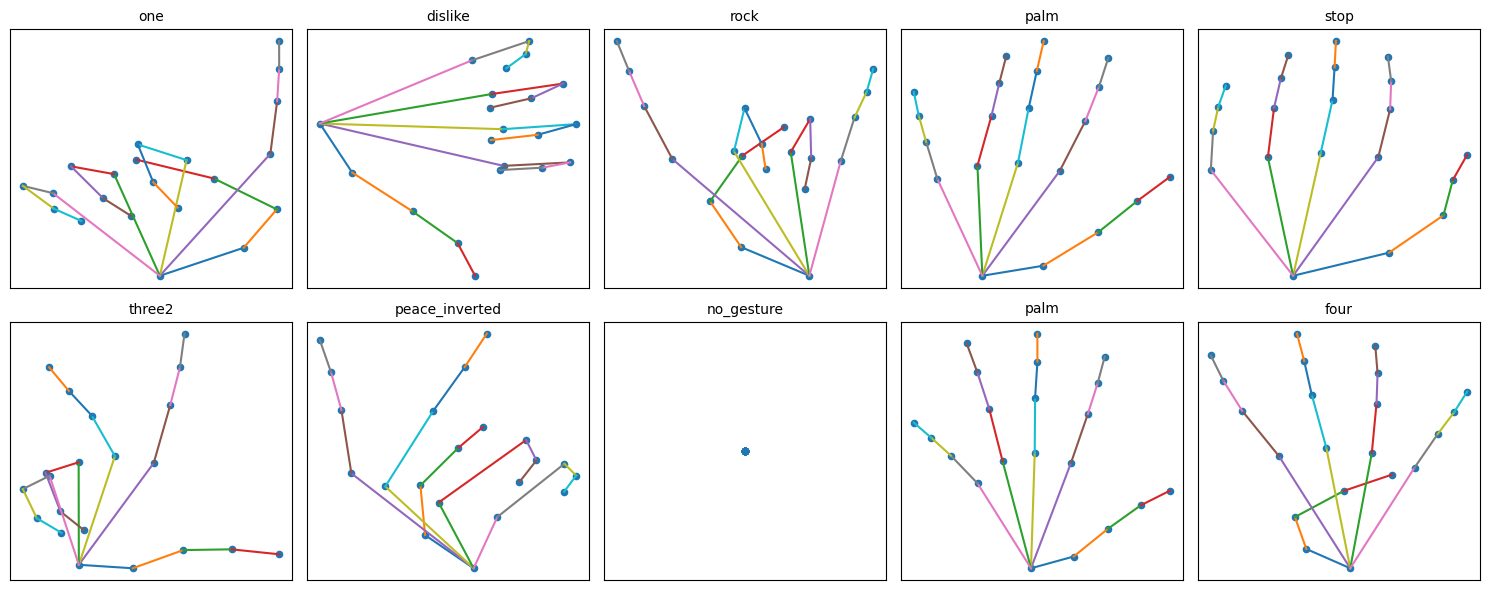

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_grid_with_labels(samples, labels):
    """
    samples: shape (N, 63)
    labels: shape (N,)
    """

    connections = [
        (0,1),(1,2),(2,3),(3,4),
        (0,5),(5,6),(6,7),(7,8),
        (0,9),(9,10),(10,11),(11,12),
        (0,13),(13,14),(14,15),(15,16),
        (0,17),(17,18),(18,19),(19,20)
    ]

    samples = np.array(samples)
    labels = np.array(labels)

    fig, axes = plt.subplots(2, 5, figsize=(15,6))

    for ax, row, label in zip(axes.flatten(), samples, labels):
        landmarks = row.reshape(21,3)
        x = landmarks[:,0]
        y = landmarks[:,1]

        ax.scatter(x, y, s=20)

        for i,j in connections:
            ax.plot([x[i], x[j]], [y[i], y[j]])

        ax.invert_yaxis()
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label, fontsize=10)

    plt.tight_layout()
    plt.show()


sample_df = data.sample(10)

X = sample_df.drop("label", axis=1).values
y = sample_df["label"].values

visualize_grid_with_labels(X, y)